# Fetal Health Classification using Machine Learning

Predicts fetal health status (Normal, Suspect, Pathological) from cardiotocography data


## 1. Import Libraries


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os


## 2. Load and Explore Data


In [10]:
# Load the dataset
# For Jupyter notebooks, the CSV should be in the same directory as the notebook
df = pd.read_csv('fetal_health.csv')

print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"Dataset shape: {df.shape[0]} samples, {df.shape[1]} features")
print(f"\nTarget variable distribution:")
print(df['fetal_health'].value_counts())
print(f"\nMissing values: {df.isnull().sum().sum()}")


DATASET OVERVIEW
Dataset shape: 2126 samples, 22 features

Target variable distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

Missing values: 0


## 3. Data Preprocessing


In [11]:
# Separate features from target
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 4. Train Model


In [12]:
print("\n" + "="*70)
print("TRAINING RANDOM FOREST CLASSIFIER")
print("="*70)

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train_scaled, y_train)



TRAINING RANDOM FOREST CLASSIFIER


,n_estimators,100
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 5. Evaluate Model


In [13]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(
    y_test, y_pred,
    target_names=['Normal', 'Suspect', 'Pathological'],
    digits=3
))



Model Accuracy: 92.72%

Classification Report:
              precision    recall  f1-score   support

      Normal      0.945     0.979     0.962       332
     Suspect      0.851     0.678     0.755        59
Pathological      0.857     0.857     0.857        35

    accuracy                          0.927       426
   macro avg      0.884     0.838     0.858       426
weighted avg      0.925     0.927     0.924       426



## 6. Visualize Results

### Confusion Matrix


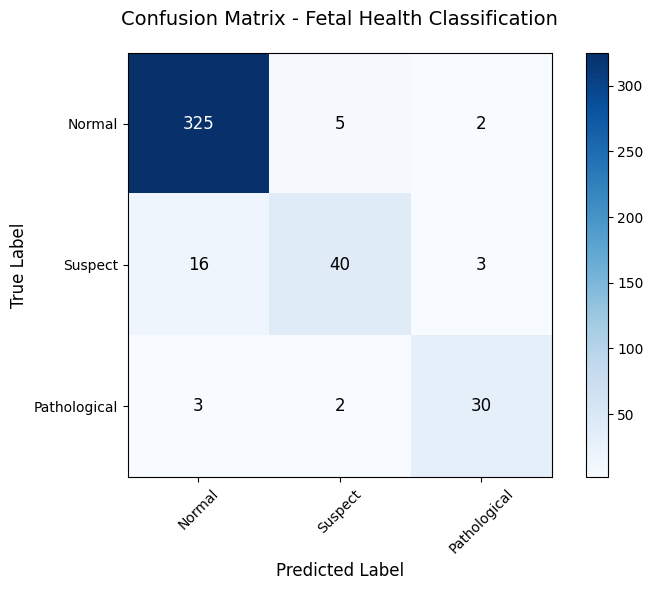

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Fetal Health Classification', fontsize=14, pad=20)
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Normal', 'Suspect', 'Pathological'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'Suspect', 'Pathological'])

# Add text annotations
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black",
                fontsize=12)

plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


### Feature Importance


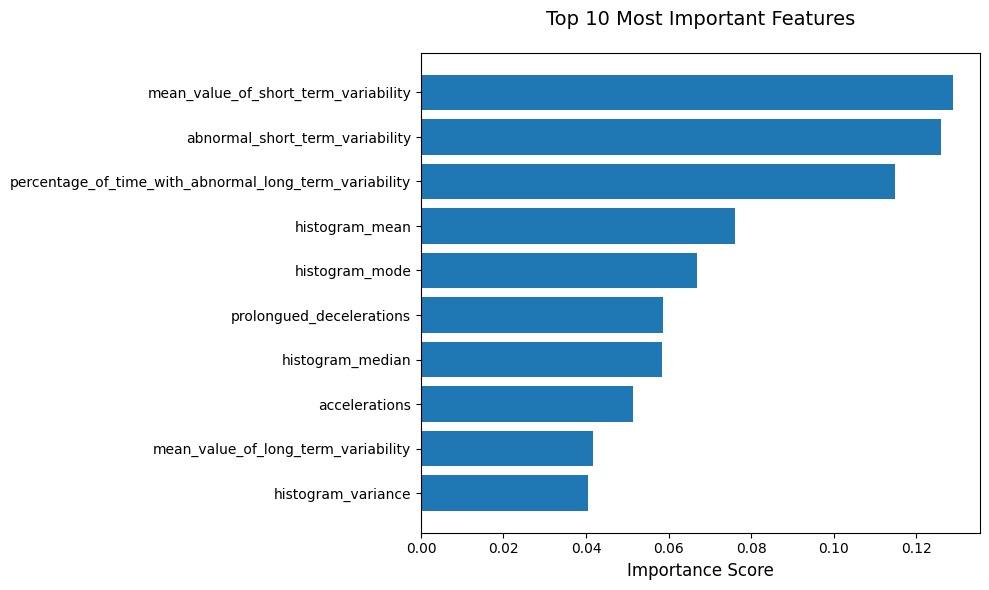

In [15]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 10 Most Important Features', fontsize=14, pad=20)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


## Summary


In [16]:
print("\n" + "="*70)
print("MODEL TRAINING COMPLETE")
print("="*70)
print(f"✓ Accuracy: {accuracy * 100:.2f}%")
print(f"✓ Visualizations saved: confusion_matrix.png, feature_importance.png")



MODEL TRAINING COMPLETE
✓ Accuracy: 92.72%
✓ Visualizations saved: confusion_matrix.png, feature_importance.png
